eda:
در این مرحله با نگاهی کلی به دیتاست، وضعیت ویژگی‌ها و اهمیت و تاثیر آنها در یادگیری را بررسی می‌کنیم.
با توجه به محدویت منابع پردازشی که در اختیار داشتیم و اینکه در کتابخانه های موحود نمی شود بیشتر از 40000 داده رو داد تصمیم بر این شد که به صورت زیر 10000 داده به صورت رندوم از داده های موجود انتخاب شود و از آنها ترین صورت بگیرد.

In [6]:
import seaborn as sns
import pandas as ps
import numpy as np
import random
filename = "train_data.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
data = ps.read_csv(filename, skiprows=skip)


#data = ps.read_csv("train_data.csv")

In [7]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,3.046091e+06,1.579004e+12,2.857100,11.257500,4765.921500,4552.734800,3895.595300,246.011700,7492.494600,0.343700,0.437100,1.186800,1811.449100,5.073105e+06,1.504000e+06,0.217800
std,1.020660e+06,3.575235e+08,1.925941,5.653476,2915.736633,2641.487122,2488.282684,513.661649,4329.381118,0.482694,0.650912,2.533919,6425.090463,3.439867e+06,7.162232e+05,0.412771
min,1.204383e+06,1.578429e+12,0.000000,0.000000,1.000000,30.000000,6.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.300000e+01,2.320000e+02,0.000000
25%,2.179794e+06,1.578713e+12,1.000000,7.000000,2167.000000,2283.000000,713.000000,11.000000,3637.000000,0.000000,0.000000,0.000000,12.000000,5.440758e+05,9.352110e+05,0.000000
50%,3.115414e+06,1.578972e+12,3.000000,10.000000,4439.000000,4257.000000,5051.000000,33.000000,7759.000000,0.000000,0.000000,0.000000,34.000000,6.526191e+06,1.552722e+06,0.000000
75%,3.902539e+06,1.579329e+12,4.000000,16.000000,6973.000000,6798.000000,5920.500000,116.000000,11571.000000,1.000000,1.000000,1.000000,160.000000,7.794060e+06,2.112412e+06,0.000000
max,4.706260e+06,1.579638e+12,6.000000,23.000000,10556.000000,9491.000000,7253.000000,2525.000000,14366.000000,3.000000,6.000000,51.000000,39680.000000,9.684055e+06,2.688638e+06,1.000000


ماتریس کوریلیشن بین ویژگی‌ها بدین گونه است:

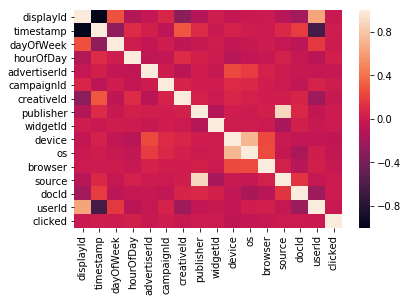

In [8]:
sns.heatmap(data.corr())

که در آن بین شناسه‌های کاربر، نمایش و زمان رابطه وجود دارد. البته که این رابطه کاذب است و به علت است که شناسه‌ها اعدادی صعودی اند و وا ورود کاربر در زمان‌های بعدی، شناسه‌های بزرگتری برای کاربر و نمایش به کاربر درنظر گرفته می‌شود.  

پس این روابط ارزشی در یادگیری ندارند. همچنین بین پلتفرم و سیستم‌عامل هم رابطه وجود دارد که مربوط به حوزه مطلوب ما نیست و دلایل معلوم دیگری دارد. منبع هم رابطه‌ای با منتشر کننده دارد که بنا به رابطه صفحات با سایت میزبان است و در صورتی که بخواهیم سایت‌ها را به تفکیک صفحات بررسی کنیم بدرد می‌خورد.

ویژگی شناسه کاربر را بررسی می‌کنیم:

(1.0146103896103895, <matplotlib.axes._subplots.AxesSubplot at 0x1fe3eea97f0>)

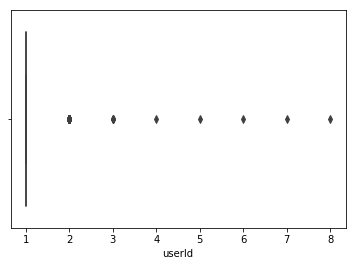

In [9]:
(np.mean(data.userId.value_counts()), sns.boxplot(data.userId.value_counts()))

می‌بینیم که از تعداد بسیار زیادی از کاربران داده‌های بسیار کمی دارم یعنی به‌طور کلی نمی‌توانیم .روی هر کابر تحلیل جداگانه بزنیم و احتمال مراجعه به تبلیغ را به طور جداگانه برای او پیدا کنیم. با توجه به رندم بودن این ویژگی، میتوانیم آن را کنار بگذاریم.  

حال ویژگی زمانی را بررسی می‌کنیم. تعداد یکتای این ویژگی بسیار بالاست و از نظر منطقی این ویژگی کمکی در یادگیری نمی‌کند. (مانند ویژگی زمان)

C:\Users\Utop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


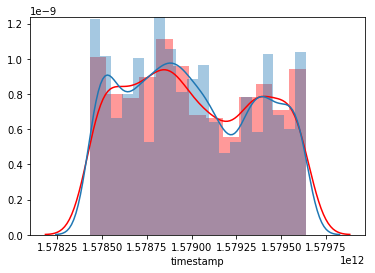

In [10]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.distplot(clicked.timestamp, color='red')
sns.distplot(unclicked.timestamp)


بنابر این تا اینجا ویژگی‌های زمان، شناسه‌ نمایش ، شناسه کاربر و سیستم‌عامل را کنار میگذاریم و استفاده ار ناشر بسته به انتخاب ما است. حال به سراغ ویژگی‌های زمان هفته و روز می‌رویم. نمودار تبلیغات کلیک شده و نشده برای هر ویژگی را رسم می‌کنیم:

In [11]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.hourOfDay)
sns.histplot(unclicked.hourOfDay)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [12]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.dayOfWeek)
sns.histplot(unclicked.dayOfWeek)

AttributeError: module 'seaborn' has no attribute 'histplot'

می‌بینیم که نسبت تبلیغات مراجعه شده و نشده در روز‌ها و ساعت مختلف برابر است. یعنی این ویژگی اگر به نتهایی و جدا از دیگر ویژگی‌ها (مانند شناسه کاربر و محتوای تبلیغ) بررسی شود، کمکی نخواهد کرد. اما در روش ‌هایی که تاثیر مقادیر مختلف دو متغیر را در نظر می‌گیرد (مانند ماشین فکتوریزیشن) این ویژگی‌ها ممکن است به‌کار آید. زیرا ممکن است هر فرد در ساعات خاصی یا برای محتوا‌های خاصی بیشتر به تبلیغ‌مراجعه کند. (علایق و زمان‌های کاری افراد متفاوت است.)

In [13]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,3.046091e+06,1.579004e+12,2.857100,11.257500,4765.921500,4552.734800,3895.595300,246.011700,7492.494600,0.343700,0.437100,1.186800,1811.449100,5.073105e+06,1.504000e+06,0.217800
std,1.020660e+06,3.575235e+08,1.925941,5.653476,2915.736633,2641.487122,2488.282684,513.661649,4329.381118,0.482694,0.650912,2.533919,6425.090463,3.439867e+06,7.162232e+05,0.412771
min,1.204383e+06,1.578429e+12,0.000000,0.000000,1.000000,30.000000,6.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.300000e+01,2.320000e+02,0.000000
25%,2.179794e+06,1.578713e+12,1.000000,7.000000,2167.000000,2283.000000,713.000000,11.000000,3637.000000,0.000000,0.000000,0.000000,12.000000,5.440758e+05,9.352110e+05,0.000000
50%,3.115414e+06,1.578972e+12,3.000000,10.000000,4439.000000,4257.000000,5051.000000,33.000000,7759.000000,0.000000,0.000000,0.000000,34.000000,6.526191e+06,1.552722e+06,0.000000
75%,3.902539e+06,1.579329e+12,4.000000,16.000000,6973.000000,6798.000000,5920.500000,116.000000,11571.000000,1.000000,1.000000,1.000000,160.000000,7.794060e+06,2.112412e+06,0.000000
max,4.706260e+06,1.579638e+12,6.000000,23.000000,10556.000000,9491.000000,7253.000000,2525.000000,14366.000000,3.000000,6.000000,51.000000,39680.000000,9.684055e+06,2.688638e+06,1.000000


In [15]:
y = data["clicked"]
x = data.drop(data.columns[[0, 1, 7, 8, 11, 14, 15]] , axis=1)
x_test = x.iloc[0:int(0.2*len(x))]
x_train = x[int(0.2*len(x)):]
y_train = y[int(0.2*len(y)):]
y_test = y.iloc[0:int(0.2*len(y))]

svm:

In [16]:
from sklearn import svm
from sklearn import metrics
clsf = svm.SVC(C=4)
clsf.fit(x_train, y_train)
y_pred = clsf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

AUC : 0.5014
Cross-entropy loss : 7.3222 
F1 score : 0.7880


boosting:
بوستینگ یک فرا الگوریتم ترکیبی در حوزه یادگیری ماشین است که برای کاهش عدم توازن و همچنین واریانس به کار می‌رود. این روش در یادگیری با نظارت مورد استفاده قرار گرفته و از خانواده الگوریتم‌های یادگیری ماشین به شمار می‌رود. این تکنیک، روشی برای تبدیل سیستمهای یادگیری ضعیف به قوی بر اساس ترکیب نتایج طبقه بندهای مختلف است. ایده اولیه این روش بر اساس سؤال مطرح شده توسط کیرنس و شجاع (۱۹۸۸، ۱۹۸۹) به وجود آمده است: آیا می‌توان با ترکیب مجموعه‌ای از سیستم‌های یادگیری ضعیف یک سیستم یادگیری قوی ایجاد نمود؟

سیستم یادگیری ضعیف، یادگیرنده‌ای است که به عنوان یک طبقه بند، تنها کمی بهتر از حالت تصادفی عمل می‌نماید (برچسب نمونه‌ها را بهتر از تصادفی حدس می‌زند). در مقابل یادگیرنده قوی طبقه‌بندی است که به تنهایی می‌تواند برچسب نمونه‌ها را خوبی پیش بینی نماید.

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Classification
clf_boosting = xgb.XGBClassifier(n_estimators=100, reg_lambda=1,reg_alpha=1, gamma=0, max_depth=None)
# n_estimator is num of gradient boosted trees # reg_alpha and reg_lmbda are regularization term # gamma is Minimum loss
clf_boosting.fit(x_train,y_train)
# Prediction
y_pred = clf_boosting.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

C:\Users\Utop\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC : 0.5109
Cross-entropy loss : 7.8403 
F1 score : 0.7730


C:\Users\Utop\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


random:

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,max_depth=3000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

C:\Users\Utop\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AUC : 0.5037
Cross-entropy loss : 7.5295 
F1 score : 0.7820


logestic:

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver="saga",multi_class="ovr",max_iter=1000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

AUC : 0.5000
Cross-entropy loss : 7.3050 
F1 score : 0.7885


C:\Users\Utop\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
